In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy

# Question 1

[0.00000000e+00 0.00000000e+00 1.02777042e+03 ... 3.97903915e-01
 3.97350575e-01 3.96798641e-01]


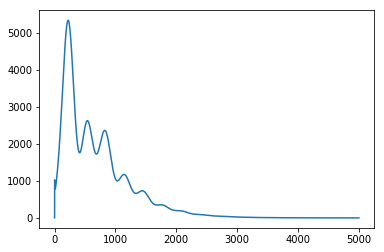

In [2]:
raw_in = np.loadtxt('example_ps.txt')
tt = raw_in[:,0]
print(tt)
plt.plot(tt)

$tt(l) = l(l+1)C_l / 2\pi$

$C_l = \dfrac{2\pi tt(l)}{(l(l+1))}$

/home/maclean/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


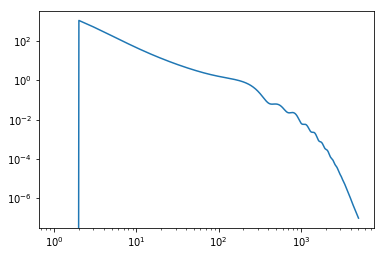

In [3]:
c_l = [2.0*np.pi*tt[l]/(l*(l+1)) for l in range(len(tt))]
plt.loglog(c_l)
c_l = c_l[2:5000]

$<a_{lm}^2> = C_l$
$<a_{lm}> = 0$
alm are complex numbers, randomly distributed around zero, with variance of C_l. the m=0 mode are strictly real (imaginary part of al0 = 0). al-m is the complex conjugate of alm. 

$T(\theta, \phi) = \Sigma Y_{lm} a_{lm}$ temperature

Variance:
$<T^2> = \Sigma_l \dfrac{C_l ( 2l + 1)}{4\pi}$

In [4]:
# part a:
varT = 0
for l in range(len(c_l)):
    varT = varT + c_l[l]*(2*l + 1)/(2.0*np.pi)
    
print('The variance in the map is: ' + str(varT))



The variance in the map is: 22155.58152195514


In [5]:
# b:
# generate the m=0 alm first
# healpy does not require the -m modes, as they are complex conj of the +m modes

lmax = len(c_l)
mmax = lmax
num_alm = mmax*(2*lmax +1 - mmax)/2 +lmax + 1
alm = []

for m in range(0, mmax):
    for l in range(0, lmax):
        if m==0:
            alm.append(np.random.normal(0, np.sqrt(c_l[l])))

        elif m>l:
            continue
        else:
            alm.append(np.random.normal(0, np.sqrt(c_l[l])) + 1.j*np.random.normal(0, np.sqrt(c_l[l])))


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


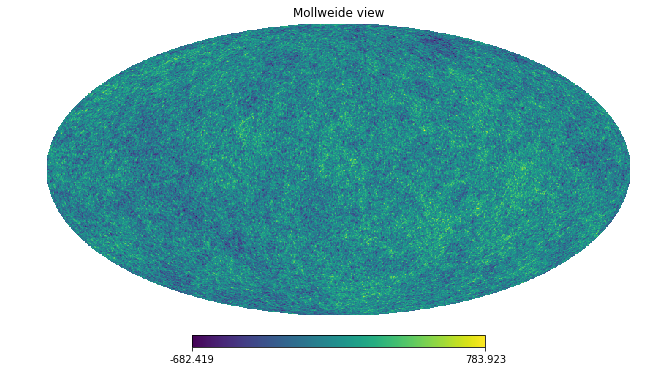

In [6]:
num_alm = mmax*(2*lmax +1 - mmax)/2 +lmax + 1
num_alm = (lmax +1)*(lmax+2)/2 


alm = np.array(alm)

#print(len(c_l))
map = healpy.alm2map(alm.astype(complex), 1000)
healpy.mollview(map)

In [7]:
mapvar = np.std(map)**2
print('Variance of the map is: ' + str(mapvar))

Variance of the map is: 22091.95659478832


## c

In [8]:

#reversed_alm = healpy.map2alm(map)
auto_ps = healpy.anafast(map)


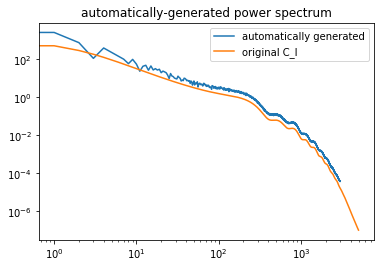

In [9]:
plt.loglog(auto_ps, label='automatically generated')
plt.loglog(c_l, label='original C_l')
plt.title('automatically-generated power spectrum')
plt.legend()

The automatically-generated power spectrum does look quite a bit like the spectrum of plotting the original input $C_l$

## d

In [10]:
synalms = healpy.synalm(np.array(c_l))
synmap = healpy.alm2map(synalms, 1000)

/home/maclean/miniconda2/lib/python2.7/site-packages/healpy/sphtfunc.py:390: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


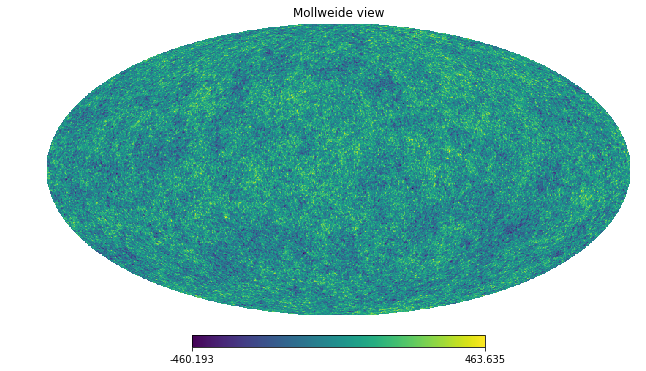

In [11]:
healpy.mollview(synmap)

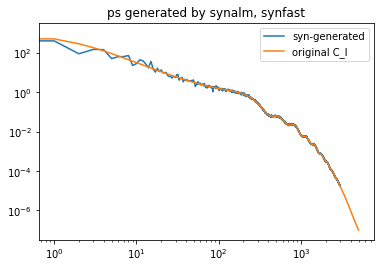

In [12]:
synps = healpy.anafast(synmap)
plt.loglog(synps, label='syn-generated')
plt.loglog(c_l, label='original C_l')
plt.title('ps generated by synalm, synfast')
plt.legend()

# Question 2
## A

- full sky: 360deg
- patch: 20deg
- so, patch fits into sky 18 times. --> $k=l/18$?
- so I guess 18 is the smallest, since int(17/18) = 0

scaling between l and k: $l = 2\pi k/x$ --> $k = x*l/(2\pi)$ where x is the number of radians across the box.

## B

Okay this one totally confused us. Below I generate some data and it looks like a map, but it's not really 'converting' cmb data to a flat sky. I don't know.


In [13]:
# choose lmax as we like I guess?
lmax = 1200
kmax = lmax/12

print('if lmax is, say, ' + str(lmax) + ' and kmax is therefore: ' + str(kmax))
num_kalms = (kmax +1)*(kmax+2)/2 
print('number of modes up to kmax: ' + str(num_kalms))


if lmax is, say, 1200 and kmax is therefore: 100
number of modes up to kmax: 5151


## C

The choice of mapsize (ie number of pixels) in a patch of a certain degree size determines the size of each pixel: $pixelsize = numberdegrees/mapsize$. Our patch is 20 degrees. Our smallest mode is ~5000, which means 5000 of its wavelengths fit into 360 degrees of sky. Therefore, 0.072 degrees is the maximum pixel size.

$0.072 = 20/mapsize$

$mapsize = 20/0.072 = 277$

This is pretty small.

map.


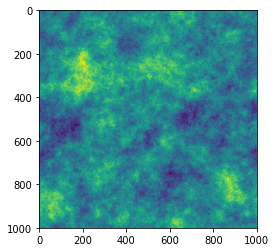

In [45]:
mapsize = 1000 # number of pixels in x, y. So pixel size = num_deg/mapsize
x = np.arange(mapsize)
x[mapsize/2:] = x[mapsize/2:] - mapsize
kx = np.repeat([x], mapsize, axis=0)
ky = np.transpose(kx)
abs_k = np.sqrt(kx**2 + ky**2)

amp = 1/(1.+abs_k)**1.5

map = np.random.randn(mapsize, mapsize)
mapft = np.fft.fft2(map)

mapback = np.fft.ifft2(mapft*amp)
mapback = np.real(mapback)
plt.imshow(mapback)

print('map.')

## d

In [43]:
var_flatmap = np.std(mapback)**2
print('The variance of the generated flat map is ' + str(var_flatmap))


#This is just simulated data, so naturally the variances don't agree.
##how do we scale this to correspond to our 'real' power spectrum?

The variance of the generated flat map is 2.4236255223305174e-06


# Question 3
## a
- sees 1 sr
- collecting area $\lambda^2$
- Tsky = 2.725K (cmb only)
- 150GHz
- energy per photon $E=h\nu$

Planck function:
$B_{\nu} = \dfrac{2h \nu^3}{c}\dfrac{1}{e^{x}-1}$, where $x=\dfrac{h\nu}{kT}$
This is in units of power per steradian per detector area per frequency ($W sr^{-1} m^{-2} Hz^{-1}$). We know $T=2.725$ from the CMB, so:

In [29]:
def planck(T, nu):
    k = 1.38e-23
    c = 3e8
    h = 6.626e-34
    return ((2.0*h*nu**3)/c)*(1.0/(np.exp((h*nu)/(k*T)) - 1))

T = 2.725
freq = 150e9
Bv = planck(T, freq)
wavelength = 3e8/freq
print('Ergs per second per meter-squared per Hertz hitting the detector: ' + str(round(Bv*1e7, 4)))
print('Detector area is lambda^2, so ' + str(wavelength**2) + ' m.')
print('So ergs per second per Hertz = ' + str(round(Bv*1e7, 4)) + ' * ' + str(wavelength**2) + ' = ' + str(Bv*1e7*wavelength**2))
print('Energy per photon is ' + str(6.626e-34*freq) + 'J at this frequency --> ' + str(6.626e-34*freq*1e7) +' ergs. So a hundred million photons per frequency? seems like a lot maybe')

Ergs per second per meter-squared per Hertz hitting the detector: 0.0114
Detector area is lambda^2, so 4e-06 m.
So ergs per second per Hertz = 0.0114 * 4e-06 = 4.5677997935119725e-08
Energy per photon is 9.939e-23J at this frequency --> 9.939e-16 ergs. So a hundred million photons per frequency? seems like a lot maybe


## b
with the same idea as in part a, but integrating over a 30GHz bandwidth centered at 150GHz:

In [40]:
import scipy.integrate as integrate

bw = np.arange(135e9, 165e9, 10000)
result = integrate.quad(lambda nu: planck(T, nu), 135e9, 165e9)
n_photons = result[0] *wavelength**2/(6.626e-34*freq*1e7)
print(str(result[0]) + ' ergs per second per meter squared over the bandwidth.')
print(str(n_photons) + ' photons per second. Actually maybe this is a reasonable number?')

print('c/lambda = ' + str(3e8/wavelength) + ' photons per second to start overlapping. So we\'re approaching the continuous limit but not quite there.')
print('')

34.1216877252 ergs per second per meter squared over the bandwidth.
1.37324429923e+11 photons per second. Actually maybe this is a reasonable number?
c/lambda = 1.5e+11 photons per second to start overlapping. So we're approaching the continuous limit but not quite there.



The above c/lambda formula for overlapping photons is from one slide, but then later you mention this:

Transition between continuous/shot noise limit:

Photon occupation number: $\dfrac{1}{e^x - 1}$ where $x=\dfrac{h\nu}{kT}$. What's the condition here that indicates the shot noise/continuous limit?

If I plug in our conditions $T=2.725K$ at $\nu = 150GHz$:

In [39]:
def photon_occ(T, nu):
    k = 1.38e-23
    h = 6.626e-34
    return 1.0/(np.exp((h*nu/(k*T))) - 1.0)

print('I find that the photon occupation is ' + str(photon_occ(2.725, 150e9)))

print('but I don\'t really know what that means. Radio is continuous at x=1, or photon occupancy ' + str(1.0/(np.exp(1) -1)))

I find that the photon occupation is 0.07659723972082995
but I don't really know what that means. Radio is continuous at x=1, or photon occupancy 0.5819767068693265


## c
Check both noise limits!

Continuous limit:
$\delta T = \dfrac{T}{\sqrt{Bt}}$

Shot noise:
$\delta n = \dfrac{n}{\sqrt{nt}}$

In [43]:
def err_cont(T, B, t):
    return T/(np.sqrt(B*t))

def err_shot(n, t):
    return n/np.sqrt(n*t)

print('continuous noise: ' + str(err_cont(T, 30e9, 1)) + 'K')
print('shot noise: ' + str(err_shot(n_photons, 1)) + ' photons. (Can we go over again the conversion from number of photons to sky temperature? This was the subject of much consternation in the homework group.')

continuous noise: 1.5732794835417303e-05K
shot noise: 370573.11009191204 photons. (Can we go over again the conversion from number of photons to sky temperature? This was the subject of much consternation in the homework group.


I'm not sure I know what you mean by improving detectors, but if the noise depends only on the sky temperature, bandwidth, and observing time, then increasing the size of the detector for example would not have an effect. But when we say improve the detectors, I usually think more of removing noise coming from the detectors/system itself, which would let us pick up fainter signals.

?
